# Aprendizado de Máquina – Aprendizado Supervisionado: Regressão

#### Alunos: Artur Bizon, Gabriel Schneider e Luciane Tedesco

Este trabalho visa entender a natureza da relação linear entre os dados. Faremos a análise de correlação, que é utilizada para medir a intensidade de associação entre duas variáveis (Relação Linear), e,  também  a  análise  de regressão,  que  é  utilizada para  prever valores de uma  variável dados  os valores de outra. A correlação foca primeiramente na associação das variáveis, enquanto a regressão é designada para ajudar a fazer previsões

### Fase 1: Análise de Correlação e Regressão Linear

Nesta etapa, faremos  a  análise  de correlação, que é utilizada para medir a intensidade de associação de duas variáveis (Relação Linear), e, também  a análise de regressão, que é utilizada para prever valores de uma variável dado os valores de outra.

A correlação  mede  a  direção  e  intensidade  da  relação  linear.  O  coeficiente  da  correlação r entre  as variáveis x e y são calculadas com a seguinte equação:
<img src="Images/corr.png">

A reta da regressão é definida por:
<img src="Images/reta.png">
Onde:
<img src="Images/beta.png">

#### 1.1 Definindo os conjuntos de dados

In [1]:
x1 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 =  [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

x2 = [10,8,13,9,11,14,6,4,12,7,5]
y2 = [9.14, 8.14, 8.47, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]

x3 = [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 19]
y3 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 5.56, 7.91, 6.89, 12.50]

#### 1.2 Definindo as funções do modelo

Nesta etapa será implementa as funções de correlacao e regressao. Cada uma terá dois vetores Nx1 como entrada, onde N é a dimensão do vetor(no  caso de  x N=11). A  primeira  função irá calcular o coeficiente de correlação r, e a segunda função irá calcular a regressão, isto é, β0 e β1.

Também será implementado outras duas funções, uma para predizer dados e outra para plotar os resultados. Como função auxiliar, será definido a "get_all_results", que retornará todos os dados nescessários para a plotagem.

In [2]:
from math  import sqrt

import numpy as np
import matplotlib.pyplot as plt

def correlation(x, y):
    x_hat = np.average(x)
    y_hat = np.average(y)
    
    n = sum((x-x_hat)*(y-y_hat))
    d = sqrt(sum((x-x_hat)*(x-x_hat)) * sum((y-y_hat) *(y-y_hat)))
    
    return n / d

def regression(x, y):
    x_hat = np.average(x)
    y_hat = np.average(y)
    
    a = (sum((x-x_hat)*(y-y_hat)))/(sum((x-x_hat)*(x-x_hat)))
    b = y_hat - a*x_hat
    
    return (a, b)

def predict(a, b, points):
    line = []
    for p in points:
        line.append(a*p + b)
    return line

def get_all_results(ptosX, ptosY):
    
    # obtem resultados
    c = correlation(ptosX, ptosY)
    a, b = regression(ptosX, ptosY)

    ptos = [min(ptosX), max(ptosX)]
    line = predict(a, b, ptos)
    
    return (a, b, c, ptos, line)

def plot_regression(ptosX, ptosY, title):
    # inicializacao
    %matplotlib inline
    ax = plt.subplot(111)
    
    # get results
    a, b, c, ptos, line = get_all_results(ptosX, ptosY)
    
    # legendas
    ax.set_xlabel("Independente X", fontsize = 10)
    ax.set_ylabel("Dependente Y", fontsize = 10)
    ax.set_title(title, fontsize = 15)
    
    # plota os pontos
    ax.scatter(ptosX, ptosY, s = 20, color = "black", marker = "o")
    
    # plota reta
    plt.plot(ptos, line, color = "blue", linestyle="solid", linewidth=1)
    
    #plota coeficientes
    y = "b0 = " + str(round(a, 3)) + 'x + ' + str(round(b, 3)) + '\nCorrelacao = ' + str(c)
    plt.legend(labels = [y])
    
    #exibe
    plt.show() 

#### 1.3 Análise de dados

Nesta etapa será analisado três conjuntos de dados, a partir dos seguintes tópicos:

- Gráfico de Dispersão
- Coeficiente de correlação
- Linha da regressão para o Gráfico de Dispersão
- Coeficientes de correlação e regressão para o Gráfico de Dispersão 

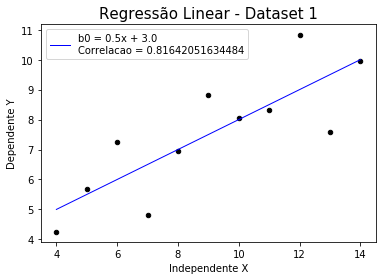

In [3]:
plot_regression(x1, y1,'Regressão Linear - Dataset 1')

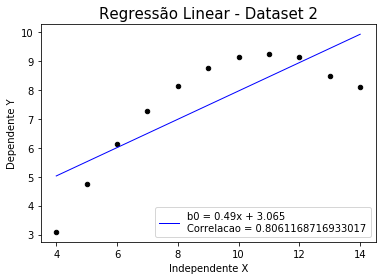

In [4]:
plot_regression(x2, y2,'Regressão Linear - Dataset 2')

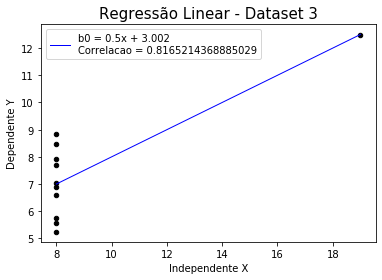

In [5]:
plot_regression(x3, y3,'Regressão Linear - Dataset 3')

In [6]:
regression_function = lambda a, b, i : "y_hat_" + str(i) + " = " + str(a) + "x + " + str(b)

correlacao_dt1 = correlation(x1, y1)
correlacao_dt2 = correlation(x2, y2)
correlacao_dt3 = correlation(x3, y3)

a_dt1, b_dt1 = regression(x1, y1)
a_dt2, b_dt2 = regression(x2, y2)
a_dt3, b_dt3 = regression(x3, y3)

print("Correlação para o dataset 1: " + str(correlacao_dt1))
print("Correlação para o dataset 2: " + str(correlacao_dt2))
print("Correlação para o dataset 3: " + str(correlacao_dt3))
print()
print(regression_function(a_dt1, b_dt1, 1))
print(regression_function(a_dt2, b_dt2, 2))
print(regression_function(a_dt3, b_dt3, 3))

Correlação para o dataset 1: 0.81642051634484
Correlação para o dataset 2: 0.8061168716933017
Correlação para o dataset 3: 0.8165214368885029

y_hat_1 = 0.5000909090909091x + 3.0000909090909103
y_hat_2 = 0.4901818181818182x + 3.0647272727272714
y_hat_3 = 0.4999090909090909x + 3.0017272727272726


#### 1.3 Conclusão -  Qual dos datasets não é apropriado para regressão linear?


Os datasets número 2 e 3 não são apropriados, pois uma reta não consegue representar a variação dos dados, gerando um problema de underfitting.

### Fase 2: Análise de Regressão Linear Múltipla

Agora, em vez de uma variável independente x (por exemplo, quando nós modelamos o preço da casa com base apenas em seu tamanho), vamos considerar múltiplas variáveis independentes x1, x2, ... xN. Com isso, iremos prever preço da 
casa com base em seu tamanho e número de quartos.

Nesta fase, teremos uma Matriz X, definida como:
<img src="Images/MatrizX.png">

Deste modo, podemos definir a linha de regressão é dada por:
<img src="Images/lreg.png">

onde:
<img src="Images/paramb.png">

#### 2.1 Download dos dados

Nesta etapa será feito o download dos dados do arquivo data.csv. 

A primeira coluna é o tamanho da casa, a segunda coluna é o número de quartos, e a terceira coluna é o preço da casa.

In [7]:
import pandas as pd

data = pd.read_csv('Dados/data.csv', header=None, names=['Tamanho', 'Quartos', 'Preco'])
data.head()

,Tamanho,Quartos,Preco
0,2104,3,399900.0
1,1600,3,329900.0
2,2400,3,369000.0
3,1416,2,232000.0
4,3000,4,539900.0


#### 2.2 Geração da matriz

- X = Variáveis independentes (tamanho da casa e o número de quartos)
- Y = Variável dependente (preço)

In [8]:
X = data[['Tamanho','Quartos']]
Y = data[['Preco']]

#### 2.3 Definindo as funções de correlação e regressão

Nesta etapa será implementado as funções para a corrrelação e a regressão do: 
- Tamanho da casa e Preço
- Número de quartos e Preço

In [11]:
import numpy as np
from numpy.linalg import inv

def multiple_reggression(x, y):
    
    x = x.values.astype(np.float64)
    Y = y.values.astype(np.float64)
    
    X = np.ones(shape=(x.shape[0], x.shape[1]+1))
    
    X[:,1] = x[:,0]
    X[:,2] = x[:,1]

    M = X.T.dot(X)
    M = inv(M)
    M = M.dot(X.T)
    M = M.dot(Y)
    
    return M

def predict_multiple_regression(data, predictor):
    
    X = np.ones(shape=(data.shape[0], data.shape[1]+1))
    
    X[:,1] = data[:,0]
    X[:,2] = data[:,1]

    return X.dot(predictor)


def correlation(x, y):
    x_hat = np.average(x)
    y_hat = np.average(y)
    
    n = sum((x-x_hat)*(y-y_hat))
    d = sqrt(sum((x-x_hat)*(x-x_hat)) * sum((y-y_hat) *(y-y_hat)))
    
    return n / d

#### 2.4 Obtenção dos resultados

In [12]:
correlacao_TamanhoPreco = correlation(X['Tamanho'], Y['Preco'])
correlacao_QuartosPreco = correlation(X['Quartos'], Y['Preco'])

print("Correlação para Tamanho da casa e Preço: " + str(correlacao_TamanhoPreco))
print("Correlação para Número de quartos e Preço: " + str(correlacao_QuartosPreco))

Correlação para Tamanho da casa e Preço: 0.8549876164803005
Correlação para Número de quartos e Preço: 0.4422615668462495


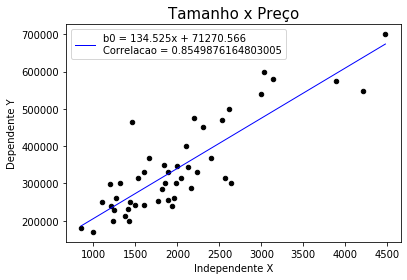

In [13]:
plot_regression(X['Tamanho'], Y['Preco'], 'Tamanho x Preço')

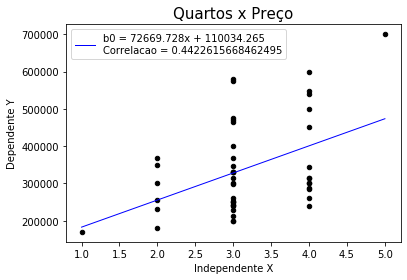

In [14]:
plot_regression(X['Quartos'], Y['Preco'], 'Quartos x Preço')

####  2.5 Calcule o preço de uma casa que tem tamanho de 1650 e 3 quartos.

In [15]:
predictor = multiple_reggression(data[["Tamanho","Quartos"]], data["Preco"])

x = np.array([[1650, 3]])
predict = predict_multiple_regression(x, predictor)
print("O preço para uma case de tamanho 1650m² com 3 quartos é de: " + str(predict[0]))

O preço para uma case de tamanho 1650m² com 3 quartos é de: 293081.5668735012


####  2.6 Gráfico 3D

Gráfico de dispersão em 3D com o tamanho da casa, número de quartos, e o preço da casa.

In [25]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt

def plot_regression_3d(data, line, title):
    #inicializacao
    
    %matplotlib notebook
    
    # obtem resultados
    ptosX = data["Tamanho"].values
    ptosY = data["Quartos"].values
    ptosZ = data["Preco"].values

    # inicializacao
    ax = plt.subplot(111, projection="3d")

    # legendas
    ax.set_xlabel("Tamanho", fontsize = 10)
    ax.set_ylabel("Número de quartos", fontsize = 10)
    ax.set_zlabel("Preço")
    ax.set_title(title, fontsize = 15)

    # plota os pontos
    ax.scatter(ptosX, ptosY, ptosZ, s = 20, color = "black", marker = "o")

    # plota reta
    ax.plot(ptosX,ptosY,line , color = "blue", linestyle="solid", linewidth=1)
    

    #plota coeficientes
    
    #exibe
    plt.show()
    

<IPython.core.display.Javascript object>


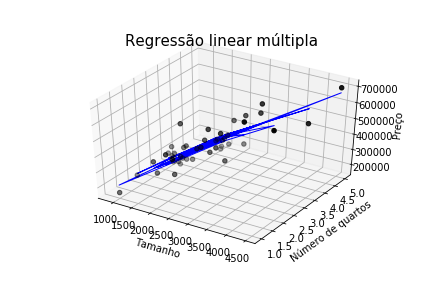

In [26]:
predictor = multiple_reggression(data[["Tamanho","Quartos"]], data["Preco"])
predict = predict_multiple_regression(data[["Tamanho","Quartos"]].values, predictor)
plot_regression_3d(data, predict, "Regressão linear múltipla")

### Fase 3 - Regressão Polinomial


Nesta fase iremos considerar a Regressão Polinomial com uma variável x. A Regressão Polinomial encaixa uma relação não linear entre o valor de x e o valor correspondente de y.

Neste caso a fórmula geral daRegressão Polinomial é:
<img src="Images/polin.png">

A linha de regressão pode ser reescrita como:
<img src="Images/lin.png">

####  3.1  Download dos dados

Nesta etapa será feito o download dos dados do arquivo data_preg.csv.
A primeira coluna representa os valores de x e a segunda coluna representa os valores de y.

In [27]:
import pandas as pd

data = pd.read_csv('Dados/data_preg.csv', header=None, names=['x', 'y'])
data.head()

,x,y
0,0.0,0.25806
1,0.1,0.50855
2,0.2,0.79357
3,0.3,0.55773
4,0.4,0.99226


####  3.1  Gráfico de Dispersão

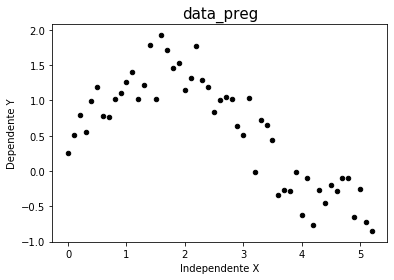

In [28]:
import matplotlib.pyplot as plt
def plot(ptosX, ptosY, title): 

    %matplotlib inline
    
    # inicializacao
    ax = plt.subplot(111)
    
    # legendas
    ax.set_xlabel("Independente X", fontsize = 10)
    ax.set_ylabel("Dependente Y", fontsize = 10)
    ax.set_title(title, fontsize = 15)
    
    # plota os pontos
    ax.scatter(ptosX, ptosY, s = 20, color = "black", marker = "o")
        
    #exibe
    plt.show() 
    
plot(data['x'],data['y'],'data_preg')

####  3.2  Função Polyfit

- Linha de regressão para N = 1 -> cor vermelha.
- Linha de regressão para N = 2 -> cor verde.
- Linha de regressão para N = 3 -> cor preta.
- Linha de regressão para N = 8 -> cor amarela.

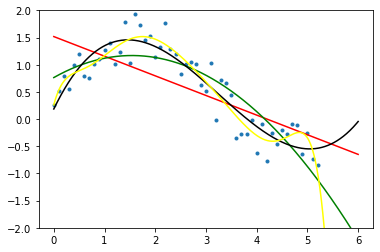

Resultado dos polyfits: 
[-0.36122026  1.51785408]
[-0.17063544  0.52608401  0.76364544]
[ 0.08715489 -0.85044357  1.92666307  0.18580853]
[-4.44075617e-03  9.04010940e-02 -7.59579029e-01  3.39098628e+00
 -8.56664376e+00  1.19854924e+01 -8.74070256e+00  3.51035653e+00
  2.61427079e-01]


In [47]:
import numpy as np
import warnings

x = data['x']
y = data['y']

p1 = np.poly1d(np.polyfit(x, y, 1))
p2 = np.poly1d(np.polyfit(x, y, 2))
p3 = np.poly1d(np.polyfit(x, y, 3))
p8 = np.poly1d(np.polyfit(x, y, 8))

xp = np.linspace(0, 6, 1000)

plt.plot(x,y, '.')
plt.plot(xp, p1(xp), color="Red")
plt.plot(xp, p2(xp), color="Green")
plt.plot(xp, p3(xp), color="Black") 
plt.plot(xp, p8(xp), color="Yellow")

plt.ylim(-2,2)
plt.show()


# resultado do polyfit sem rotacionar
print("Resultado dos polyfits: ")
print(np.polyfit(x, y, 1))
print(np.polyfit(x, y, 2))
print(np.polyfit(x, y, 3))
print(np.polyfit(x, y, 8))

####  3.3  Erro Quadrático Médio (EQM)

- Verificar o Erro Quadrático Médio (EQM) para cada linha de regressão. Qual é o mais preciso?

In [48]:
def mse(y, y_hat):
    return np.square(np.subtract(y,y_hat)).mean()

def predict(X, polyfit):
    polyfit = polyfit[::-1]
    predictions = []
    for x in X:
        y = 0
        for i in range(len(polyfit)): 
            y += polyfit[i]*pow(x, i)
        predictions.append(y)
    
    return predictions

In [49]:
predictions_2 = predict(x, np.polyfit(x, y, 2))
predictions_3 = predict(x, np.polyfit(x, y, 3))
predictions_8 = predict(x, np.polyfit(x, y, 8))

print(mse(y, predictions_2))
print(mse(y, predictions_3))
print(mse(y, predictions_8))

0.1385264902757942
0.07869725256060663
0.05870934697362682


O melhor resultado foi o modelo com grau 8

####  3.4 Evitando o Overfitting

- Para evitar o overfitting, dividamos os dados aleatoriamente em Dados de Treinamento e Dados de Teste. Use os primeiros 10% dos dados como conjunto de teste, e o resto como de treinamento.

- Repita os passos de c -f, mas agora use apenas os dados detreinamentopara ajustar a linha de regressão.

In [50]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

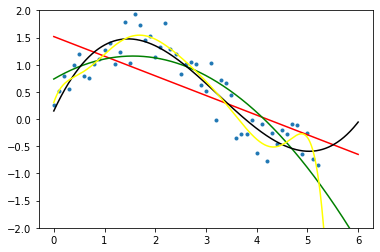

[ 0.73682423  0.54180653 -0.17361534]
[ 0.14964503  2.00730101 -0.88557496  0.09089047]
[ 3.03666796e-01  2.76875490e+00 -7.27500630e+00  1.11666740e+01
 -8.65403168e+00  3.63109950e+00 -8.48981508e-01  1.04200203e-01
 -5.22794434e-03]


In [51]:
import numpy as np

p2 = np.poly1d(np.polyfit(x_train, y_train, 2))
p3 = np.poly1d(np.polyfit(x_train, y_train, 3))
p8 = np.poly1d(np.polyfit(x_train, y_train, 8))

xp = np.linspace(0, 6, 1000)

plt.plot(x,y, '.')
plt.plot(xp, p1(xp), color="Red")
plt.plot(xp, p2(xp), color="Green")
plt.plot(xp, p3(xp), color="Black") 
plt.plot(xp, p8(xp), color="Yellow")

plt.ylim(-2,2)
plt.show()

print(np.polyfit(x_train, y_train, 2)[::-1])
print(np.polyfit(x_train, y_train, 3)[::-1])
print(np.polyfit(x_train, y_train, 8)[::-1])

####  3.5 Erro Quadrático Médio (EQM) para os Dados de Teste

- Repita o passo 3.3, mas agora utilize somente os dados de Testepara calcular o erro.

In [52]:
import warnings
warnings.filterwarnings('ignore')

test_predictions_2 = predict(x_test, np.polyfit(x_test, y_test, 2))
test_predictions_3 = predict(x_test, np.polyfit(x_test, y_test, 3))
test_predictions_8 = predict(x_test, np.polyfit(x_test, y_test, 8))

print(mse(y_test, test_predictions_2))
print(mse(y_test, test_predictions_3))
print(mse(y_test, test_predictions_8))

0.059311676178944985
0.04057434731726237
5.699099545517286e-29


O metodo mais preciso é o elevado ao cubo.